# **SureStart Makeathon Team 4 Trash Detection Deep Learning Model**

## **Installing Libraries**

In [ ]:
# Install the latest version of PyTorch and torch-vision, then install the fvcore library that contains a collection of PyTorch Functions. This was developed by Facebook research.
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-l3elsfsk
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-l3elsfsk
  Resolved https://github.com/facebookresearch/fvcore.git to commit 51092b5515cbb493f73de079743dd6b11cc4bbf1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.6-py3-none-any.whl size=65405 sha256=fcec61dfb07a947dcd1ca3f66f23b22ee06b8c847b811c5e5167f10bfc9d9117
  Stored in directory: /tmp/pip-ephem-wheel-cache-ymldwjk6/wheels/1a/ae/26/d93adc5470e3323d9144ccbcb7b8be77f040ec5087c3839d70
  Created wheel for iopath: filename=

'1.13.1+cu116'

## **Detectron2 From Facebook Research**
Detectron2 is a ground-up rewrite of Detectron that started with maskrcnn-benchmark. The platform is now implemented in PyTorch. With a new, more modular design, Detectron2 is flexible and extensible, and able to provide fast training on single or multiple GPU servers. Detectron2 includes high-quality implementations of state-of-the-art object detection algorithms, including DensePose, panoptic feature pyramid networks, and numerous variants of the pioneering Mask R-CNNmodel family also developed by FAIR. Its extensible design makes it easy to implement cutting-edge research projects without having to fork the entire codebase. 

https://ai.facebook.com/blog/-detectron2-a-pytorch-based-modular-object-detection-library-/

In [ ]:
# Clone the Detectron2 from Facebook Research GitHub
# Detectron2 is a popular open-source framework computer vision library that was built with PyTorch. This library can be utilized for a plethora of tasks such as Object Detection, Segmentation, etc.
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 14887, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 14887 (delta 32), reused 40 (delta 25), pack-reused 14826
Receiving objects: 100% (14887/14887), 6.07 MiB | 4.94 MiB/s, done.
Resolving deltas: 100% (10779/10779), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/detectron2_repo
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 9.6 MB/s eta 0:00:00
  Preparing metadata 

## **Importing Libraries and Utilities**

In [ ]:
# The runtime may need to be restarted so that the installation take will take effect
# Some basic setup
# Setting up Detectron2 Logger which is the logging system for the library
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Import Common Libraries
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Import Some Detectron2 Utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

## **Installing TACO Dataset**
Trash Annotations in COntext

This is a dataset of pictures showing trash in diverse natural settings, such as roads and forests

In [ ]:
# Clone the TACO repo
!git clone https://github.com/pedropro/TACO

Cloning into 'TACO'...
remote: Enumerating objects: 740, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 740 (delta 116), reused 132 (delta 89), pack-reused 580
Receiving objects: 100% (740/740), 98.85 MiB | 5.26 MiB/s, done.
Resolving deltas: 100% (493/493), done.


In [ ]:
# Move the folder that contains the JSON annotations to Home
!cp -r TACO/data .

In [ ]:
# Download The Taco Dataset Images 
!python TACO/download.py

Note. If for any reason the connection is broken. Just call me again and I will start where I left.
Finished


In [ ]:
#os is used to intreact with the operating system
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

## **Fixing Errors in the Dataset**

In [ ]:
# The downloaded dataset had an error where the annotations of IDs were repeated
# The following code block identifies which IDs were repeated and how many times they were repeated
import json
  
# Opening JSON file
f = open('data/annotations.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
  
# Iterating through the json
# list

ids = {}

for i in data["annotations"]:
    if i["id"] in ids.keys():
      ids[i["id"]] = ids[i["id"]] + 1
    else:
      ids[i["id"]] = 1

for i in ids:
  if ids[i] > 1:

    print("ID: ", i, "Number of times repeated: ", ids[i])

ID:  309 Number of times repeated:  2
ID:  4040 Number of times repeated:  2


In [ ]:
# Resgister the dataset 
from detectron2.data.datasets import register_coco_instances
register_coco_instances("taco_dataset_v4", {}, "data/new_annotations.json", "data")

In [ ]:
# To combat this issue we selected the IDs that were repeated in the dataset and assigned that ID with a random number between 10,000 & 1,000,000.
# Now the IDs of the annotation were random numbers and did not interfere with anything else.
import random

for i in data["annotations"]:
    if i["id"] in [309, 4040]:
       i["id"] = random.randrange(10000, 1000000, 1)
with open('data/new_annotations.json', 'w') as f:
    json.dump(data, f)

## **Setting Up The Model To Train**

In [ ]:
#Model Training
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

#Initializes the new congifuatin object. cfg is used to store various settings, hyperparameters which control the model during training.
cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("taco_dataset_v4",)
cfg.DATASETS.TEST = ()   
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  

# Processes Two Images In Each Batch
cfg.SOLVER.IMS_PER_BATCH = 2

# The Base Learning Rate 
cfg.SOLVER.BASE_LR = 0.00025

#The number of Epochs or Maximum Number of Iterations
cfg.SOLVER.MAX_ITER = 7500

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 60  

# This part of the code creates a directory in the cfg config file and stores the output training. 
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
#This is responsible for training the model
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[03/09 18:39:08 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:11, 14.9MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[03/09 18:39:25 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[03/09 18:39:55 d2.utils.events]:  eta: 1:42:17  iter: 19  total_loss: 5.666  loss_cls: 4.034  loss_box_reg: 0.7674  loss_mask: 0.6931  loss_rpn_cls: 0.09105  loss_rpn_loc: 0.02149  time: 1.0140  last_time: 0.7286  data_time: 0.2889  last_data_time: 0.0206   lr: 4.9953e-06  max_mem: 2762M
[03/09 18:40:14 d2.utils.events]:  eta: 1:41:49  iter: 39  total_loss: 5.635  loss_cls: 3.924  loss_box_reg: 0.8235  loss_mask: 0.6931  loss_rpn_cls: 0.11  loss_rpn_loc: 0.02862  time: 0.9912  last_time: 1.0652  data_time: 0.2736  last_data_time: 0.3897   lr: 9.9902e-06  max_mem: 2762M
[03/09 18:40:32 d2.utils.events]:  eta: 1:42:26  iter: 59  total_loss: 5.316  loss_cls: 3.645  loss_box_reg: 0.7355  loss_mask: 0.6919  loss_rpn_cls: 0.03053  loss_rpn_loc: 0.01371  time: 0.9576  last_time: 0.8156  data_time: 0.1852  last_data_time: 0.0097   lr: 1.4985e-05  max_mem: 2762M
[03/09 18:40:52 d2.utils.events]:  eta: 1:44:26  iter: 79  total_loss: 4.841  loss_cls: 3.146  loss_box_reg: 0.8757  loss_mask: 0.689

In [ ]:
#Setting the path for the pre trained model weights
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")

#Setting a threshold for object detection. Thus when the model scans an image it would return predictions with a score of 0.5 or above. 
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

#Define the dataset within the cfg configuration file
cfg.DATASETS.TEST = ("taco_dataset_v4", )

#Generate predictions
predictor = DefaultPredictor(cfg)

[03/09 20:34:21 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


## **Selecting an Image to Test the Model**

In [113]:
#Testing a Single Image From Batch 1
test_image = "/content/data/batch_1/000015.jpg"

In [ ]:
#Testing Random Images From a Specific Batch
import glob
image_test_select = glob.glob('/content/data/batch_8' + "/*.jpg")
test_image = random.choice(image_test_select)
print("Selected Image:", test_image)

Selected Image: /content/data/batch_8/000055.jpg


In [111]:
# Testing Random Image 1 From Google Images
test_image = "/content/Random Image 1.jpg"

In [ ]:
# Testing Random Image 2 From Google Images
test_image = "/content/Random Image 2.jpg"

In [ ]:
# Testing Random Image 3 From Google Images
test_image = "/content/Random Image 3.jpg"

## **Visualizing The Predictions**

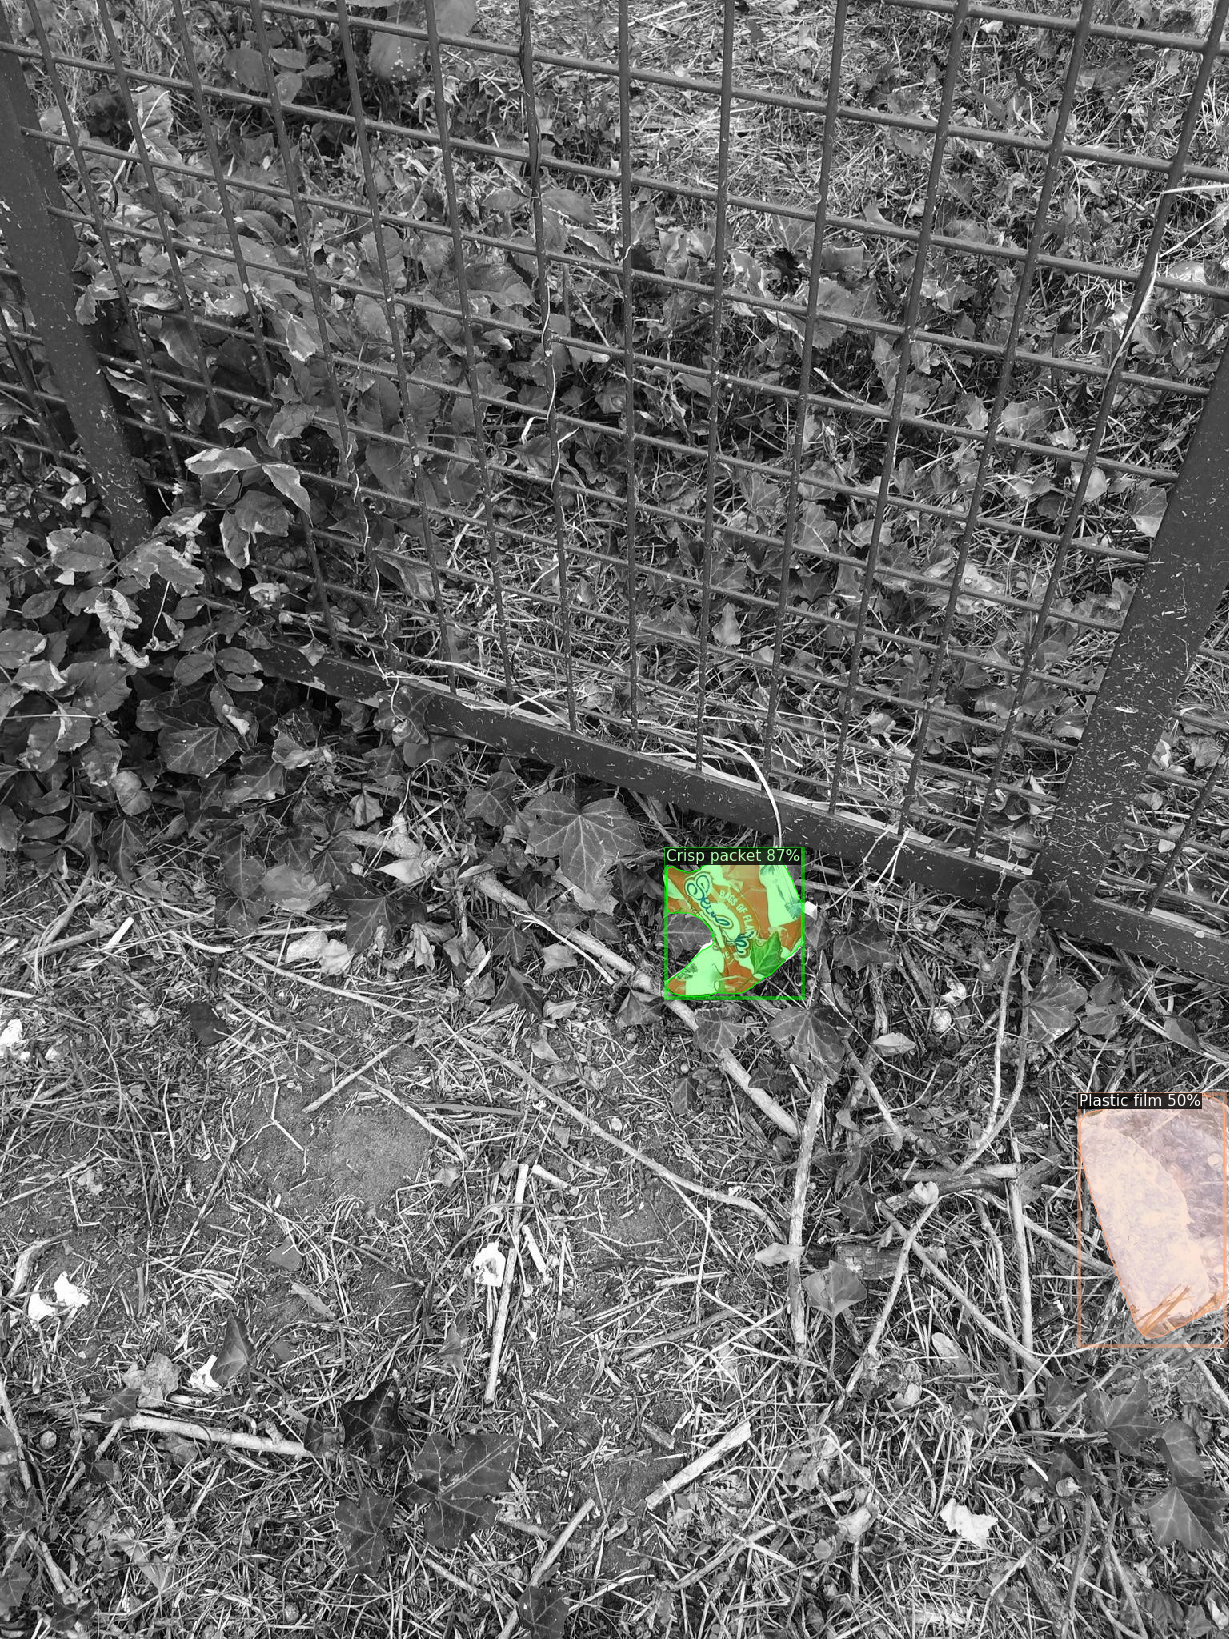

In [114]:
#This code block is used to visualize the predictions made by the deep learning model
from detectron2.utils.visualizer import ColorMode
im = cv2.imread(test_image)
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
               metadata=MetadataCatalog.get("taco_dataset_v4"),
               scale=0.8, 
               instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])